In [1]:
### Import libraries

import os
import PIL
import requests
import math

import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Download example image

# Image location and path
url = "https://github.com/ShawnHymel/computer-vision-with-embedded-machine-learning/raw/master/2.1.4%20-%20Project%20-%20Convolution%20and%20Pooling/resistor.png"
folderpath = r"C:\Users\mramd\Desktop\Coursera\computer-vision-with-embedded-machine-learning\Convolution_Pooling_Project\content"
img_path = os.path.join(folderpath, "resistor.png")

# Download image
resp = requests.get(url)

# Write image to file
with open(img_path, 'wb') as f:
  f.write(resp.content)

(28, 28)
img= [[141 143 147 146 144 147 147 147 147 147 147 147 149 149 149 149 149 149
  149 149 149 149 149 149 149 149 148 147]
 [142 146 147 147 146 147 147 147 147 147 148 149 149 149 149 149 149 150
  150 150 149 149 149 149 149 149 149 148]
 [146 147 147 147 147 147 147 148 149 149 149 149 151 151 151 151 150 151
  152 150 151 149 150 149 149 149 149 149]
 [146 147 147 147 147 147 148 149 149 149 149 150 155 154 154 153 152 154
  153 150 150 149 149 149 149 149 149 149]
 [146 146 147 147 147 149 149 149 149 151 151 153 155 155 155 154 155 155
  155 153 153 149 149 149 149 150 150 149]
 [147 147 147 149 149 149 149 151 154 155 155 155 155 155 155 155 155 155
  155 155 154 150 149 149 150 151 150 150]
 [147 147 148 149 149 149 149 153 155 154 154 155 155 155 155 155 155 155
  155 155 154 152 152 149 151 153 153 150]
 [147 147 147 149 149 149 149 154 155 154 155 155 155 155 155 155 155 157
  157 155 155 154 155 154 153 155 155 150]
 [147 147 149 149 151 151 152 154 155 155 155 155 

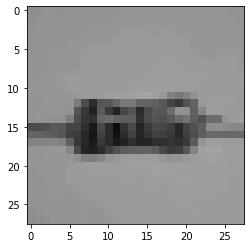

In [3]:
### Open and view image

# Use PIL to open the image and convert it to grayscale
img = PIL.Image.open(img_path)
img = img.convert('L')

# Convert image to Numpy array
img = np.asarray(img)

# Show dimensions and view array as image
print(img.shape)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
print("img=",img)

In [4]:
### Convolution function

def convolve(img, kernel, stride):
    
  print("kernel=",kernel)
  print("stride of ",stride)
 

  # Compute dimensions of output image
  out_height = math.floor((img.shape[0] - kernel.shape[0]) / stride) + 1
  out_width = math.floor((img.shape[1] - kernel.shape[1]) / stride) + 1

  print("out image height=",out_height)
  print("out image width=",out_width) 
  
  # Create blank output image
  convolved_img = np.zeros((out_height, out_width))

  # >>> NEW CODE HERE <<<
   
  for i in np.arange(0,out_height):
     for j in np.arange(0,out_width):
     
        elementwise_productsum=0
     
        for m in np.arange(0,kernel.shape[0]):
          for n in np.arange(0,kernel.shape[1]):
            elementwise_productsum += img[(stride*i)+m,(stride*j)+n] * kernel[m,n] 
        # Populate output image matrix with productsum values    
        convolved_img[i,j] = elementwise_productsum 
  
  print("convolved_img=",convolved_img)
        
  # Round all elements, convert to integers, and clamp to values between 0 and 255
  convolved_img = np.rint(convolved_img).astype(int)
  convolved_img = np.clip(convolved_img, 0, 255)

  return convolved_img

(3, 3)
kernel= [[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
stride of  1
out image height= 26
out image width= 26
convolved_img= [[145.1875 146.5625 146.5625 146.3125 146.6875 147.0625 147.25   147.4375
  147.625  148.     148.625  149.25   149.5    149.5    149.4375 149.5
  149.875  150.0625 149.8125 149.4375 149.1875 149.125  149.0625 149.
  148.9375 148.625 ]
 [146.375  146.9375 146.9375 146.875  147.     147.375  147.9375 148.375
  148.5625 148.8125 149.6875 150.875  151.3125 151.1875 150.875  150.75
  151.25   151.25   150.5    149.875  149.4375 149.25   149.125  149.
  149.     148.9375]
 [146.625  146.9375 147.     147.125  147.5    148.0625 148.625  149.0625
  149.375  149.75   151.125  153.     153.625  153.3125 152.8125 152.6875
  153.125  152.6875 151.4375 150.4375 149.5625 149.125  149.0625 149.0625
  149.1875 149.1875]
 [146.5625 147.     147.375  147.75   148.3125 148.875  149.5    150.375
  151.1875 151.8125 153.     154.375  154.8125 154.5625

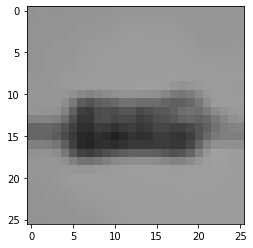

In [5]:
### Test 1: Gaussian blur filter

# Define kernel (A smaller 3x3 matrix to do element wise operations on the larger image matrix)
kernel = np.array([[1/16, 2/16, 1/16],
                   [2/16, 4/16, 2/16],
                   [1/16, 2/16, 1/16]])

print(kernel.shape)

# Call the convolve function where kernel matrix is shifted by a stride of 1)
convolved_out_img = convolve(img, kernel, 1)

print(convolved_out_img.shape)
plt.imshow(convolved_out_img, cmap='gray', vmin=0, vmax=255)

kernel= [[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
stride of  1
out image height= 26
out image width= 26
convolved_img= [[   8.    6.    5.   -4.    4.   -1.   -3.   -5.   -7.    0.    3.   -2.
    -6.   -6.   -5.   -6.    1.    0.    1.   -4.   -3.   -1.   -1.    0.
     1.    4.]
 [   8.    1.    1.    1.    0.   -4.    1.    7.    5.    2.   -8.    2.
    -4.   -2.    1.   -9.   -2.    8.   -5.   12.   -4.    8.   -1.    0.
     0.    1.]
 [   4.    1.    0.   -2.   -5.   -1.    4.   -1.   -4.   -9.  -12.   22.
     5.    8.    2.   -7.    9.    4.  -17.   -4.   -8.   -1.   -1.   -1.
    -2.   -2.]
 [  -6.   -1.   -4.   -8.    7.    1.   -6.  -15.   -3.   -9.   -1.    8.
     2.    5.   -2.    7.    6.   10.   -1.   14.  -11.   -1.   -1.   -4.
     3.    3.]
 [   1.   -4.    9.    4.    2.   -6.    1.   15.   17.   12.    7.    2.
     0.    1.    1.    1.    0.    2.    6.   11.  -12.   -7.   -6.   -1.
     2.   -6.]
 [  -1.    2.    5.    0.    0.  -11.    8.   10.   -5.   -6.    1.    

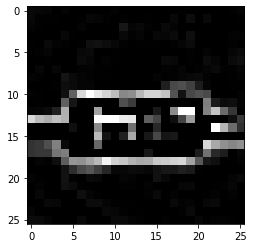

In [6]:
### Test 2: Edge detection

# Define kernel
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

# Call your convolve function (with a stride of 1)
out_img = convolve(img, kernel, 1)

# Show dimensions and view array as image
print(out_img.shape)
plt.imshow(out_img, cmap='gray', vmin=0, vmax=255)

kernel= [[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]
stride of  2
out image height= 13
out image width= 13
convolved_img= [[ 151.  149.  148.  146.  144.  152.  147.  147.  151.  152.  149.  149.
   149.]
 [ 149.  147.  144.  151.  147.  144.  155.  154.  159.  144.  148.  149.
   148.]
 [ 148.  153.  149.  150.  161.  157.  155.  156.  155.  158.  146.  148.
   152.]
 [ 147.  151.  147.  159.  151.  155.  155.  155.  161.  151.  152.  157.
   159.]
 [ 151.  147.  164.  156.  156.  155.  154.  156.  157.  159.  161.  153.
   155.]
 [ 150.  149.  145.  232.  214.  227.  199.  236.  223.  125.  190.  153.
   153.]
 [ 150.  152.  227.   31.  176. -155.   92.   65.   67.  318.   10.  227.
   163.]
 [ -20.   44.   -3.   51.  137. -146.  119.   56.   76.  -76.   72.  247.
   165.]
 [ 150.  162.   93.   42.  100.  -50.   -2.  -44.   -1.   24.   41.  216.
   200.]
 [ 148.  151.  171.  179.  195.  222.  214.  210.  218.  226.  182.  168.
   155.]
 [ 151.  147.  162.  152.  160.  156.  158.  154.  161. 

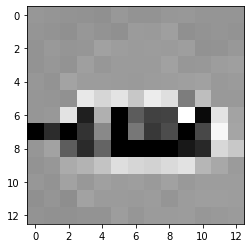

In [7]:
### Test 3: Sharpen with stride > 1

# Define kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# Call your convolve function (with a stride of 2)
out_img = convolve(img, kernel, 2)

# Show dimensions and view array as image
print(out_img.shape)
plt.imshow(out_img, cmap='gray', vmin=0, vmax=255)

In [8]:
### Max pooling function

def maxpool_1(img, pool_height, pool_width, stride):

  # Try setting stride amounts according to pool lengths when computing output matrix height and width
  # stride_y = pool_height
  # stride_x = pool_width

  # Compute dimensions of output image
  out_height = math.floor((img.shape[0] - pool_height) / stride)+1
  out_width = math.floor((img.shape[1] - pool_width) / stride)+1
  
  # Create a blank output image
  pooled_img = np.zeros((out_height, out_width))
 
   
  # >>> NEW CODE

  for i in np.arange(0, out_height):
      for j in np.arange(0, out_width):
            
            # Get an initial max value
            maxval= img[(stride * i), (stride * j)]
            
            # Iterate through 2D Kernel/Pool matrix with stride
            for m in np.arange(0, pool_height):
                for n in np.arange(0, pool_width):
                    if(img[(stride * i)+m, (stride * j)+n] > maxval):
                        maxval = img[(stride * i) + m, (stride * j) + n] # Update max value if current value greater than previous
                        
                pooled_img[i,j] = maxval
                #print(" my maxval=",i,j,pooled_img[i,j])
                
            
            
  # Round all elements, convert to integers, and clamp to values between 0 and 255
  pooled_img = np.rint(pooled_img).astype(int)
  pooled_img = np.clip(pooled_img, 0, 255)

  return pooled_img

In [9]:
### Max pooling function

def maxpool_2(img, pool_height, pool_width):

  # Set stride amounts
  stride_y = pool_height
  stride_x = pool_width

  # Compute dimensions of output image
  out_height = math.floor((img.shape[0] - pool_height) / stride_y) + 1
  out_width = math.floor((img.shape[1] - pool_width) / stride_x) + 1
  
  # Create blank output image
  pooled_img = np.zeros((out_height, out_width))

  # >>> NEW CODE 

  # Loop through each pixel in the output array. Note that this is not the most efficient way of
  # doing convolution, but it provides some insights into what's going on.
  for i in np.arange(0, out_height):
    for j in np.arange(0, out_width):

      # Set output to the value of the first element in the window
      out_val = img[(stride_y * i), (stride_x * j)]

      # Look through each element in the window to find the max value
      for m in np.arange(0, pool_height):
        for n in np.arange(0, pool_width):
          out_val = max(out_val, img[(stride_y * i) + m, (stride_x * j) + n])

      # Set element in output array to the max value
      pooled_img[i, j] = out_val
      #print(" outval=",i,j,pooled_img[i,j])

  # Round all elements, convert to integers, and clamp to values between 0 and 255
  pooled_img = np.rint(pooled_img).astype(int)
  pooled_img = np.clip(pooled_img, 0, 255)

  return pooled_img

In [10]:
### average pooling function to do


(14, 13)


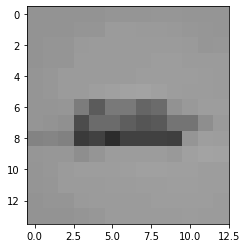

In [55]:
### Test 1: Max pool original image with pool size of (2, 3)

# Call pooling function (with pool_size=(2, 3) and stride=2)
out_img = maxpool_1(img, 2, 3, 2)

# Show dimensions and view array as image
print(out_img.shape)
plt.imshow(out_img, cmap='gray', vmin=0, vmax=255)

(14, 9)


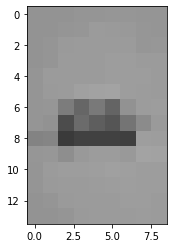

In [56]:
### Test 1: Max pool original image with pool size of (2, 3)

out_img = maxpool_2(img, 2, 3)

# Show dimensions and view array as image
print(out_img.shape)
plt.imshow(out_img, cmap='gray', vmin=0, vmax=255)

kernel= [[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
stride of  1
out image height= 26
out image width= 26
convolved_img= [[   8.    6.    5.   -4.    4.   -1.   -3.   -5.   -7.    0.    3.   -2.
    -6.   -6.   -5.   -6.    1.    0.    1.   -4.   -3.   -1.   -1.    0.
     1.    4.]
 [   8.    1.    1.    1.    0.   -4.    1.    7.    5.    2.   -8.    2.
    -4.   -2.    1.   -9.   -2.    8.   -5.   12.   -4.    8.   -1.    0.
     0.    1.]
 [   4.    1.    0.   -2.   -5.   -1.    4.   -1.   -4.   -9.  -12.   22.
     5.    8.    2.   -7.    9.    4.  -17.   -4.   -8.   -1.   -1.   -1.
    -2.   -2.]
 [  -6.   -1.   -4.   -8.    7.    1.   -6.  -15.   -3.   -9.   -1.    8.
     2.    5.   -2.    7.    6.   10.   -1.   14.  -11.   -1.   -1.   -4.
     3.    3.]
 [   1.   -4.    9.    4.    2.   -6.    1.   15.   17.   12.    7.    2.
     0.    1.    1.    1.    0.    2.    6.   11.  -12.   -7.   -6.   -1.
     2.   -6.]
 [  -1.    2.    5.    0.    0.  -11.    8.   10.   -5.   -6.    1.    

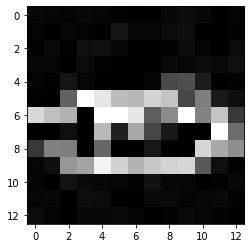

In [57]:
### Test 2a: Detect edges and pool

# Define kernel
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

# Call your convolve function (with a stride of 1)
convolved_img = convolve(img, kernel, 1)

# Call your pooling function (with pool_size=(2, 2) and stride 2)
out_img = maxpool_1(convolved_img, 2, 2, 2)

# Show dimensions and view array as image
print(out_img.shape)
plt.imshow(out_img, cmap='gray', vmin=0, vmax=255)

kernel= [[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
stride of  1
out image height= 26
out image width= 26
convolved_img= [[   8.    6.    5.   -4.    4.   -1.   -3.   -5.   -7.    0.    3.   -2.
    -6.   -6.   -5.   -6.    1.    0.    1.   -4.   -3.   -1.   -1.    0.
     1.    4.]
 [   8.    1.    1.    1.    0.   -4.    1.    7.    5.    2.   -8.    2.
    -4.   -2.    1.   -9.   -2.    8.   -5.   12.   -4.    8.   -1.    0.
     0.    1.]
 [   4.    1.    0.   -2.   -5.   -1.    4.   -1.   -4.   -9.  -12.   22.
     5.    8.    2.   -7.    9.    4.  -17.   -4.   -8.   -1.   -1.   -1.
    -2.   -2.]
 [  -6.   -1.   -4.   -8.    7.    1.   -6.  -15.   -3.   -9.   -1.    8.
     2.    5.   -2.    7.    6.   10.   -1.   14.  -11.   -1.   -1.   -4.
     3.    3.]
 [   1.   -4.    9.    4.    2.   -6.    1.   15.   17.   12.    7.    2.
     0.    1.    1.    1.    0.    2.    6.   11.  -12.   -7.   -6.   -1.
     2.   -6.]
 [  -1.    2.    5.    0.    0.  -11.    8.   10.   -5.   -6.    1.    

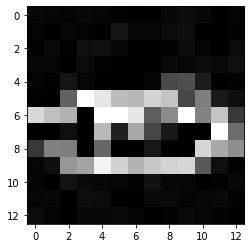

In [58]:
### Test 2b: Detect edges and pool

# Define kernel
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

# Call your convolve function (with a stride of 1)
convolved_img = convolve(img, kernel, 1)

# Call your pooling function (with pool_size=(2, 2))
out_img = maxpool_2(convolved_img, 2, 2)

# Show dimensions and view array as image
print(out_img.shape)
plt.imshow(out_img, cmap='gray', vmin=0, vmax=255)

In [59]:
### average output.....